In [56]:
from dictlearner import DictLearnerFactory
from lif import LIFFactory
import numpy as np
from utils import Config, getAttributes
config = Config
import matplotlib.pyplot as plt

## Reproducing LIF receptive fields

This section reproduces the receptive fields shown in Appendix A, Fig. 1.

In [65]:
fpath = "./data/"
config.load(fpath)
config.fpath = fpath
config.VT = -1.9e-2 # we raise the firing threshold because the stimulus is sparse
config.logger.local = True
config.num_euler_steps = 50000 # we simulate for more timesteps to calculate more detailed receptive fields 
getAttributes(config) # showing config

{'lif_name': 'kglight1',
 'dictlearner_name': 'globalposnormregl1',
 'batch_size': 256,
 'num_units': 900,
 'emb_dim': 256,
 'num_euler_steps': 5000,
 'lr_Phi': 0.1,
 'lr_VT': 0.001,
 'magnifier_base': 1000,
 'target_rate': 0.1,
 'target_l1': 0.03,
 'VT': -0.017,
 'DIRPREFIX': 'l1rate0.03',
 'WE': 14.0,
 'WI': 10.0,
 'RE': 2,
 'RI': 5,
 'TREF': 5e-05,
 'SID': 45645937,
 'fpath': './data/',
 'logger': <utils.Log at 0x141068970>}

Initializing the LIF model \& loading the feedforward weights giving Fig. 1

In [66]:
lif = LIFFactory.registry[config.lif_name](config)
dictlearner = DictLearnerFactory.registry[config.dictlearner_name](config, lif)
dictlearner.load_codewords(100000)
lif.init_internal_state()

Computing receptive fields (~12 min)

In [67]:
batch = np.eye(256) # emb_dim = 256
batch = batch - np.mean(batch, axis=1)
batch = batch / np.std(batch, axis=1)

stimulus_p = dictlearner.get_stimulus(batch)
lif.init_internal_state()
act_p = lif.stimulate(stimulus_p)

stimulus_m = dictlearner.get_stimulus(-batch)
lif.init_internal_state()
act_m = lif.stimulate(stimulus_m)

activation = (act_p - act_m).reshape(batch.shape[0], 30, 30)

Error at 4999th euler step [Errno 2] No such file or directory: '../../project/result/batch256_kglight1/l1rate0.03nunits900we10.0wi10.0re2ri3tref0.00005/logfile.txt'
GL: 5.0000e-05, stimulus: 3.0245e-05, post_cond @ Kt: 2.1955e-05, voltage: 4.4125e-02
Error at 4999th euler step [Errno 2] No such file or directory: '../../project/result/batch256_kglight1/l1rate0.03nunits900we10.0wi10.0re2ri3tref0.00005/logfile.txt'
GL: 5.0000e-05, stimulus: 3.0245e-05, post_cond @ Kt: 1.2132e-05, voltage: 4.4117e-02


Plotting receptive fields (~30 s)

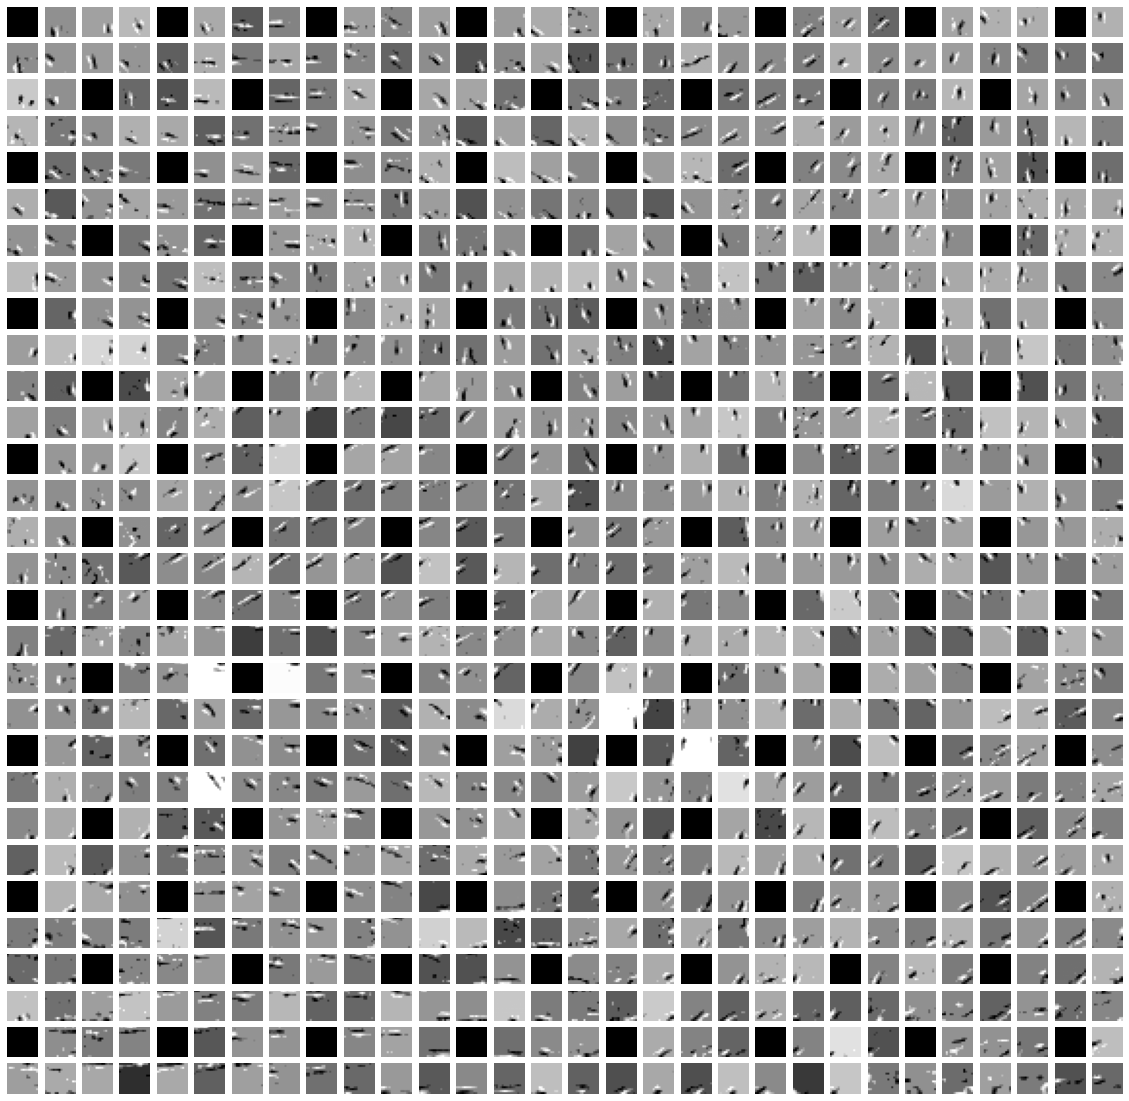

In [68]:
fig, ax = plt.subplots(30, 30, figsize=(20,20))
for i in np.arange(30):
    for j in np.arange(30):
        # inhibitory neuron
        if (i % 4 == 0 and j % 4 == 0) or (i % 4 == 2 and j % 4 == 2):
            ax[i,j].imshow(np.zeros((16,16)), cmap='gray')
        # excitatory neuron
        else:
            ax[i,j].imshow(activation[:,i,j].reshape(16,16), cmap='binary')
        ax[i,j].axis('off')